In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import re
from   sklearn import preprocessing
from   sklearn.linear_model import LinearRegression
from   sklearn.model_selection import train_test_split
from   sklearn import metrics
from   datetime import date
from   datetime import datetime
from   matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick

%matplotlib inline

In [2]:
# Load up files that only have original movies
# Unfortunately, this is a very small set as to what the MVP was
dfo_temp = pd.read_csv("movie_originals_only_final.csv")

dfs_temp = pd.read_csv("movie_sequels_only_final.csv")


In [3]:
dfo_temp.head()
#dfo_temp.shape

,Movie Title,Release Date,Gross USA (USD),Runtime,IMDB Rating
0,Spider-Man,3 May 2002 (USA),"$407,022,860",2h 1min,7.3
1,The Matrix,31 March 1999 (USA),"$171,479,930",2h 16min,8.7
2,The Lord of the Rings: The Fellowship of the Ring,19 December 2001 (USA),"$315,544,750",2h 58min,8.8
3,Back to the Future,3 July 1985 (USA),"$211,159,762",1h 56min,8.5
4,Lethal Weapon,6 March 1987 (USA),"$65,207,127",1h 49min,7.6


In [4]:
dfs_temp.head()
#dfs_temp.shape

,Movie Title,Release Date,Gross USA (USD),Runtime,IMDB Rating
0,Spider-Man 2,30 June 2004 (USA),"$373,585,825",2h 7min,7.3
1,The Matrix Reloaded,15 May 2003 (USA),"$281,576,461",2h 18min,7.2
2,The Lord of the Rings: The Two Towers,18 December 2002 (USA),"$342,551,365",2h 59min,8.7
3,Back to the Future Part II,22 November 1989 (USA),"$119,000,002",1h 48min,7.8
4,Lethal Weapon 2,7 July 1989 (USA),"$147,253,986",1h 54min,7.2


In [5]:
# Convert text month to numeric
def monthToNum(shortMonth):

    return{
        'January' : 1,'February' : 2,'March' : 3,'April' : 4,'May' : 5,'June' : 6,'July' : 7,
        'August' : 8,'September' : 9, 'October' : 10,'November' : 11,'December' : 12
    }[shortMonth]

def days_between(d1, d2):
    
    # d1 and d2 are strings
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    
    delta_days = abs((d2 - d1).days)
    
    return delta_days


# Now for X <- These are your Xs from the originals
# Let's rewrite this
gross_raw        = list(dfo_temp['Gross USA (USD)'])
runtime_raw      = list(dfo_temp['Runtime'])
imdb_rating      = list(dfo_temp['IMDB Rating'])
release_date_raw = list(dfo_temp['Release Date'])


gross = []
runtime = []
release_month = []
release_date = []

#print(gross_raw)

# Convert it to floating numeric
for i_gross in gross_raw:
    temp = re.sub('[\$,]', '', i_gross)
    gross.append(float(temp))

    
# Convert to mins
for i_runtime in runtime_raw:
        
    hour, minute = i_runtime.split("h")
        
    if minute == '':
        minutes =  60 * int(hour)
    else:
        minutes = (60 * int(hour)) + int(minute.strip("min"))    
    
    runtime.append(minutes)
    
# Get date but only in months
for i_date in release_date_raw:
    
    #day, month, year, location = i_date.split(" ")
    temp = i_date.strip().split(" ")
    
    #print(temp)
    
    date_day   = int(temp[0])
    date_month = monthToNum(temp[1])
    date_year  = int(temp[2])
    
    date_str = str(date_year) + '-' + str(date_month) + '-' + str(date_day)
    
    # Let's look at month only for now
    release_month.append(date_month)
    
    release_date.append(date_str)
    
    
    #print(date_day,date_month,date_year)


In [6]:
# Now for Y which are the sequels
gross_seq_raw        = list(dfs_temp['Gross USA (USD)'])
release_date_seq_raw = list(dfs_temp['Release Date'])

gross_seq = []
release_date_seq = []

diff_days = []

# Convert it to floating numeric
for i_seq_gross in gross_seq_raw:
    temp_seq = re.sub('[\$,]', '', i_seq_gross)
    gross_seq.append(float(temp_seq))


# Get release date for sequel and convert it to a format to be used later
for i_date_seq in release_date_seq_raw:
    
    #day, month, year, location = i_date.split(" ")
    temp = i_date_seq.strip().split(" ")
    
    #print(temp)
    
    date_seq_day   = int(temp[0])
    date_seq_month = monthToNum(temp[1])
    date_seq_year  = int(temp[2])
    
    date_seq_str = str(date_seq_year) + '-' + str(date_seq_month) + '-' + str(date_seq_day)
    
    # Let's look at month only for now
    release_date_seq.append(date_seq_str)
    
#print(release_date_seq)

# Get difference in days from release
for idate1,idate2 in zip(release_date,release_date_seq):
    #print(idate1,idate2)
    diff_days_temp = days_between(idate1, idate2)
    
    diff_days.append(diff_days_temp)


#print(diff_days)

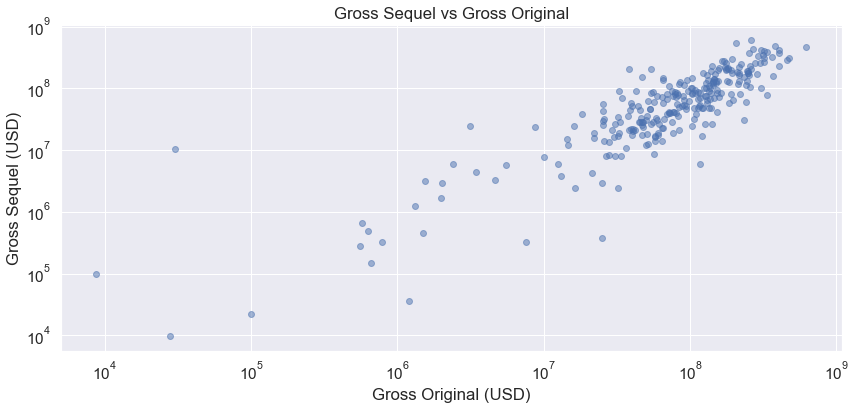

In [22]:
plt.figure(figsize=(14,6))
#plt.scatter(np.log10(gross),np.log10(gross_seq),alpha=0.5);
plt.scatter(gross,gross_seq,alpha=0.5);
plt.xscale('log')
plt.yscale('log')
plt.title('Gross Sequel vs Gross Original');
plt.xlabel('Gross Original (USD)');
plt.ylabel('Gross Sequel (USD)');
plt.savefig('gross_sequel_vs_original.svg')
#plt.grid()

In [8]:
# Plot a histogram
#plt.figure(figsize=(14,6))
#plt.hist(gross,bins = 8);

#sns.boxplot(data=);

random_seed = 55

In [9]:
# Let's do a linear regression
lrn1 = LinearRegression()

X = np.array(np.log10(gross)).reshape(-1,1)
y = np.array(np.log10(gross_seq)).reshape(-1,1)

# Now lets train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=random_seed)

# Let's do a fit on the model
lrn1.fit(X_train,y_train);

# Print out the R^2 for the model against the full dataset
print('Score =', lrn1.score(X_train,y_train))

print('Coefficient = ',lrn1.coef_)
print('Intercept   = ',10**(lrn1.intercept_))

Score = 0.7351813392354836
Coefficient =  [[0.93319747]]
Intercept   =  [2.25917409]


r2 score of train     = 0.7351813392354836
r2 score of predicted = 0.794317928103978
Mean Absolute Error: 35628095.46662145
Mean Squared Error: 3123600165690915.0
Root Mean Squared Error: 55889177.53636132


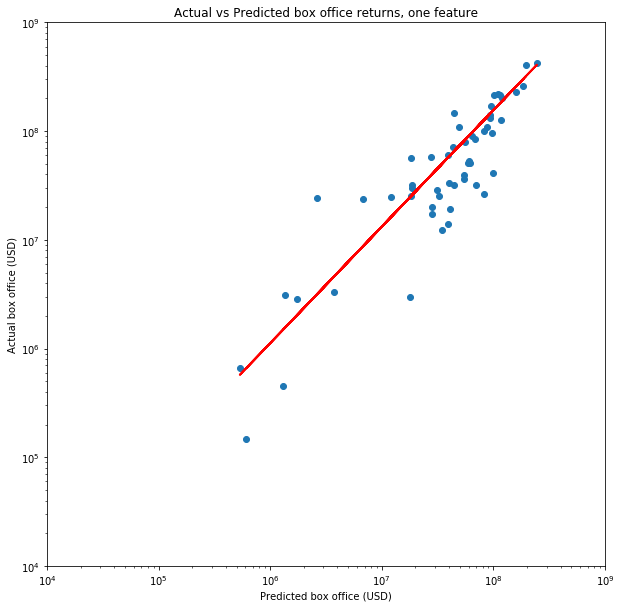

In [10]:
# Do it on the test set
# Prediction
# This is only using one feature
y_pred = lrn1.predict(X_test)

#print(y_org_pred.shape)

r2_1_train = lrn1.score(X_train,y_train)
r2_1_pred  = lrn1.score(X_test,y_test)

#size_X_train = X_test.shape
#print(size_X_train)

print('r2 score of train     =', r2_1_train)
print('r2 score of predicted =', r2_1_pred)

#fmt = '${x*1e-6:,1.0f}M'
#tick = mtick.StrMethodFormatter(fmt)
#ax.yaxis.set_major_formatter(tick) 

#y_actual.shape
#fig, ax = plt.
plt.figure(figsize=(10,10))
plt.xscale('log')
plt.yscale('log')
plt.scatter(10**(y_pred),10**(y_test));
plt.plot(10**(y_pred), 10**(X_test), color='red', linewidth=2)
plt.xlabel('Predicted box office (USD)');
plt.ylabel('Actual box office (USD)');
plt.title('Actual vs Predicted box office returns, one feature');
plt.axis([1e4, 1e9, 1e4, 1e9]);
plt.savefig('gross_movie_one_feature.svg')

print('Mean Absolute Error:', metrics.mean_absolute_error(10**(y_test), 10**(y_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(10**(y_test), 10**(y_pred))  )
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(10**(y_test), 10**(y_pred))))

#print(10**(y_pred))

#plt.grid()

In [25]:
#print(10**y_pred)
#print(10**(X_test[10**(y_pred)<1e5]))

#print(10**(X_test[0]),10**(X_test[-1]))
#print(10**(y_pred[0]),10**(y_pred[-1]))

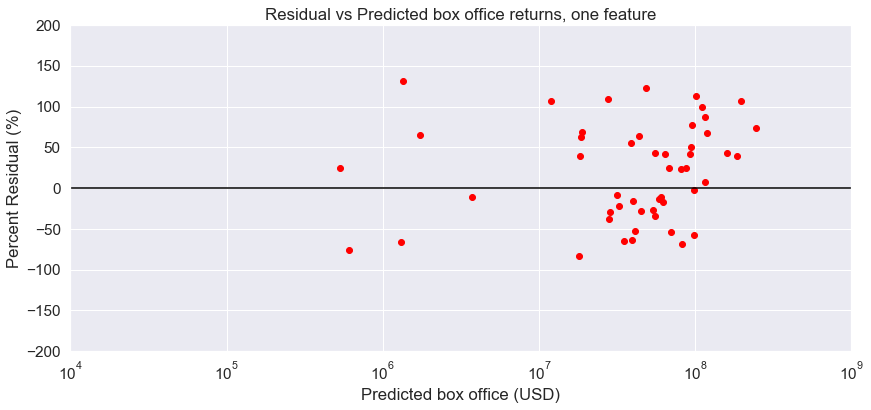

In [23]:
# Let's plot the residuals
resid_pct = (10**(y_test) - 10**(y_pred))/10**(y_pred)*100

#print(resid)

plt.figure(figsize=(14,6))
plt.xscale('log')
#plt.yscale('log')
plt.scatter(10**(y_pred),resid_pct,color='red');
plt.xlabel('Predicted box office (USD)');
plt.ylabel('Percent Residual (%)');
plt.title('Residual vs Predicted box office returns, one feature');
plt.axhline(y = 0, color='black');
plt.savefig('resid.svg')
#plt.grid()
plt.axis([1e4, 1e9, -200, 200]);

In [13]:
# Lets add more features, multi-regression
myDict = {'Gross (USD)':np.log10(gross),
          'Runtime (mins)': runtime,
          'IMDB Rating': imdb_rating,
          'Release Month': release_month,
          'Days since Original': diff_days
         }

X_df = pd.DataFrame(myDict)

#sns.boxplot(data=X_df['Runtime (mins)','IM']);

X_mult = X_df.values
y_mult = np.array(np.log10(gross_seq)).reshape(-1,1)
# You already have y from above

# Linear Regression object for multiple features
lrn2 = LinearRegression()

# Now lets train the model one more time
X_mult_train, X_mult_test, y_mult_train, y_mult_test = train_test_split(X_mult, y_mult, test_size=.2, random_state=random_seed)

# fit
# Fit the model to the trained data set
lrn2.fit(X_mult_train,y_mult_train);

# Print out the R^2 for the model against the full dataset
print('R2 Score of training box office =', lrn2.score(X_mult_train,y_mult_train))
print('R2 Score of predicted box office =', lrn2.score(X_mult_test,y_mult_test))

#coeff_df = pd.DataFrame(lrn2.coef_, X_df.columns, columns=['Coefficient'])  
#coeff_df
print(lrn2.coef_)
print(lrn2.intercept_)

R2 Score of training box office = 0.764438712120394
R2 Score of predicted box office = 0.7877978021705645
[[ 9.37437170e-01  5.00591528e-04  1.24267497e-01  2.03593460e-02
  -7.14552133e-06]]
[-0.71945247]


<class 'numpy.ndarray'>


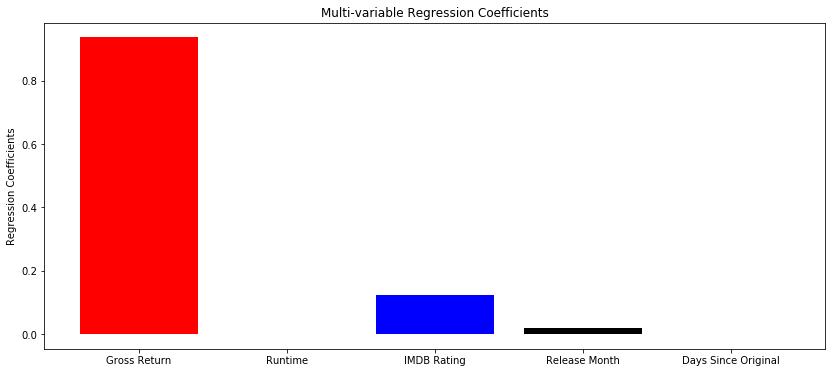

In [14]:
# Bar plot for coefficients
print(type(lrn2.coef_))

xbar_p = np.array(['Gross Return','Runtime','IMDB Rating','Release Month','Days Since Original'])
ybar_p = lrn2.coef_.ravel()

plt.figure(figsize=(14,6))
plt.bar(xbar_p, ybar_p,color='rgbkymc')
#plt.xticks(y_pos, objects)
plt.ylabel('Regression Coefficients')
plt.title('Multi-variable Regression Coefficients')
plt.savefig('bar_coefficients.svg')
#ax = sns.barplot(x=xbar_p, y=ybar_p, palette="rocket");
#sns.set_ylabel('Regression Coefficient')
#ax1.axhline(0, color="k", clip_on=False)
#ax1.set_ylabel("Sequential")
#sns_plot.savefig('bar_coefficients.svg')



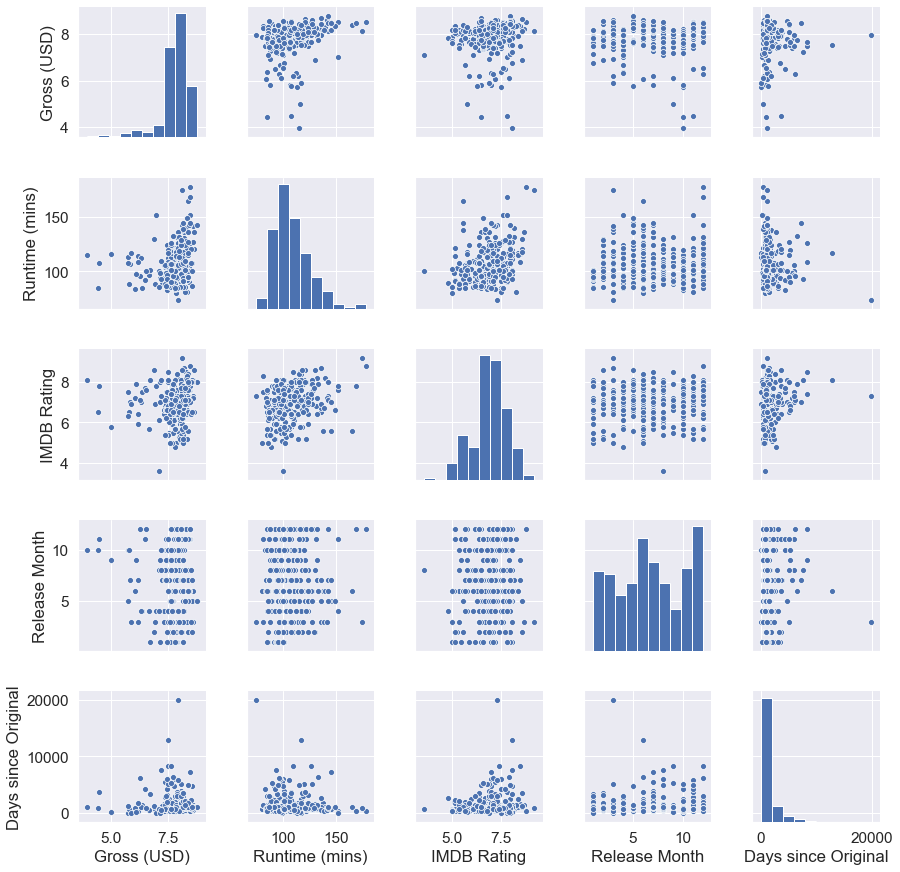

In [15]:
# Pair plot for all data
sns.set(font_scale=1.4)
sns_plot = sns.pairplot(X_df);
sns_plot.savefig('pairplot.svg')

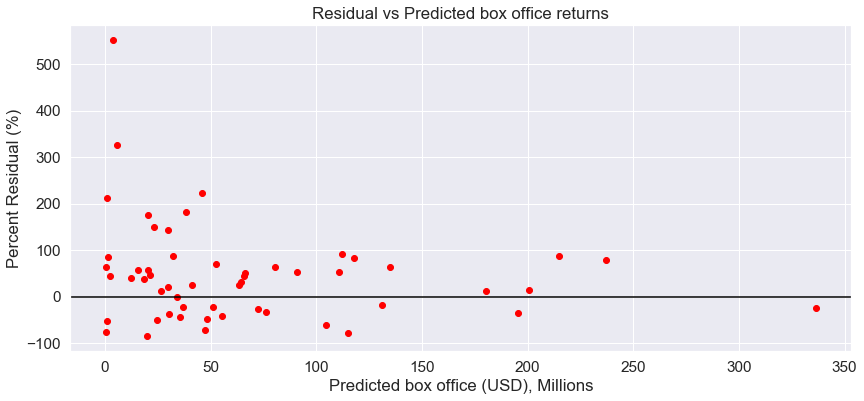

In [24]:
# Now let's make a prediction 
y_mult_pred = lrn2.predict(X_mult_test)

#print(len(X_mult_test[:,0]))

resid_mult_pct = (10**(y_mult_test) - 10**(y_mult_pred))/10**(y_mult_pred)*100

#print(resid_mult_pct>0)

plt.figure(figsize=(14,6))
plt.scatter(10**(y_mult_pred)/1e6,resid_mult_pct,color='red');
#plt.plot(X_mult_test[:,0], resid_mult, color='red', linewidth=2)
plt.xlabel('Predicted box office (USD), Millions');
plt.ylabel('Percent Residual (%)');
plt.title('Residual vs Predicted box office returns');
#plt.axis([0, 10, 0, 20])
plt.axhline(y = 0, color='black');
plt.savefig('resid_multi.svg')

#plt.grid()

In [17]:
print('Mean Absolute Error     :', metrics.mean_absolute_error(10**(y_mult_test), 10**(y_mult_pred)))
print('Mean Squared Error      :', metrics.mean_squared_error(10**(y_mult_test), 10**(y_mult_pred))  )
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(10**(y_mult_test), 10**(y_mult_pred))))

Mean Absolute Error     : 36089644.03732906
Mean Squared Error      : 2973965581051429.5
Root Mean Squared Error : 54534077.245805025
